In [20]:
import pandas as pd

In [21]:
def preprocess():
    pass

In [22]:
stations = pd.read_csv("../project/data/dwd/stations.tsv", sep="\t")

#remove stations with empty Beginn or Ende
mask = stations["Beginn"] == " "
stations = stations[~mask]
mask = stations["Ende"] == " "
stations = stations[~mask]

stations["Beginn"] = pd.to_datetime(stations["Beginn"], dayfirst=True)
stations["Ende"] = pd.to_datetime(stations["Ende"], dayfirst=True)

stations.head()

,Stationsname,Stations_ID,Kennung,Stations-kennung,Breite,Länge,Stations-höhe,Flussgebiet,Bundesland,Beginn,Ende
0,Aach,1,KL,02783,47.8410,8.8490,478,,BW,1937-01-01,1986-06-30
1,Aach,1,RR,70191,47.8410,8.8490,478,,BW,1912-01-01,1986-06-30
2,Aach/Hegau,10771,PE,10771,47.8500,8.8500,480,,BW,1951-02-27,2000-06-15
3,Aachen,3,EB,02205,50.7827,6.0941,202,803100,NW,1951-01-01,2011-03-31
4,Aachen,3,FF,02205,50.7827,6.0941,202,803100,NW,1937-01-01,2011-03-31


In [23]:
from datetime import datetime
bw_stations = stations.loc[stations["Bundesland"] == "BW"].drop_duplicates(subset= ["Stationsname", "Stations-kennung"])

current_bw_stations = bw_stations[bw_stations["Ende"] >= datetime(day=2, month=12, year=2023)]
id_str = current_bw_stations["Stations-kennung"].to_string(index=False).replace("\n ", ",")

In [24]:
import requests

# repsonse = requests.get(f'https://dwd.api.proxy.bund.dev/v30/stationOverviewExtended?stationIds={id_str}')

In [69]:
import json
content = json.loads(repsonse.content.decode("utf-8"))
response_ids = content.keys()

bw_response_stations = current_bw_stations[current_bw_stations["Stations-kennung"].isin(response_ids)]
s = bw_response_stations["Stationsname"].to_string(index=False).replace("\n", "| ")
s = s.replace(" ", "")
s

'Altheim,KreisBiberach|Baden-Baden-Geroldsau|Balingen-Bronnhaupten|Buchen,Kr.Neckar-Odenwald|Buchenbach|Dachsberg-Wolpadingen|Ellwangen-Rindelbach|Elzach-Fisnacht|Emmendingen-Mundingen|Eppingen-Elsenz|Friedrichshafen-Unterraderach|Geisingen|Großerlach-Mannenweiler|Hechingen|Hermaringen-Allewind|Kirchberg/Jagst-Herboldshausen|Merklingen|Müllheim|Münsingen-Apfelstetten|Neubulach-Oberhaugstett|Notzingen|Obersulm-Willsbach|Ohlsbach|Pforzheim-Ispringen|Pfullendorf|Renningen-IhingerHof|Rheinau-Memprechtshofen|Rottweil|Sachsenheim|SchwäbischGmünd-Weiler|Sigmaringen-Laiz|Singen|Villingen-Schwenningen|Weingarten,Kr.Ravensburg|Wolfach|Wutöschingen-Ofteringen'

In [41]:
cost_per_request = 12000
num_stations = len(bw_response_stations)
credits_total = 15000000

credits_total / cost_per_request / num_stations

response = requests.get("http://my.meteoblue.com/packages/basic-1h_basic-day?lat=47.558&lon=7.573&apikey=DEMOKEY")
response.content

b'{"error_message":"This api key requires signature validation. Please specify the url parameter &sig=md5(<url>&secrect=<secret>)","error":true}'

/tmp/ipykernel_488/3404676141.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

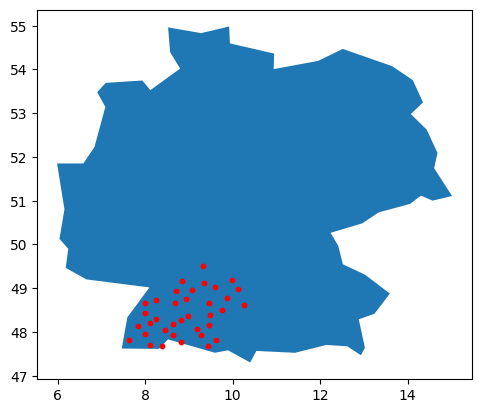

In [49]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt


geometry = [Point(xy) for xy in zip(bw_response_stations['Länge'], bw_response_stations['Breite'])]
gdf = GeoDataFrame(bw_response_stations, geometry=geometry)

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
germany = world[world["name"] == "Germany"]

fig, ax = plt.subplots()

germany.plot(
    ax=ax
)
gdf.plot(ax=ax, color="r", markersize=10)